In [ ]:
def compute_confusion_matrix(true, pred):
  K = len(np.unique(true)) # Number of classes 
  result = np.zeros((K, K))

  for i in range(len(true)):
    result[true[i]][pred[i]] += 1

  return result

In [ ]:
def accuracy(y_true,y_pred):
  accuracy=np.sum(y_true==y_pred) / len(y_true)
  return accuracy

In [ ]:
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        old_dw = None
        old_db = None
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            if np.array_equal(dw,old_dw) and old_db == db:
              break
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            old_dw = dw
            old_db = db
        print("Iterations : ", _)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [ ]:
# regressor=LogisticRegression(lr=0.001,n_iters=1000)
m1 = [1,0]
sig1 = [[1,0.75],[0.75,1]]
m2 = [0,1]
sig2 = [[1,-0.5],[0.5,1]]


X_train = np.append(np.random.multivariate_normal(m1,sig1, 500), np.random.multivariate_normal(m2,sig2, 500), axis=0)
Y_train = [0]*500 + [1]*500
X_test = np.append(np.random.multivariate_normal(m1,sig1, 500), np.random.multivariate_normal(m2,sig2, 500), axis=0)
Y_test = [0]*500 + [1]*500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.linear_model import LogisticRegression as LR
clf = LR(random_state=0).fit(X_train, Y_train)
pred = clf.predict(X_test)
tpr = []
fpr = []

In [ ]:
regressor = LogisticRegression(learning_rate=0.0001)
regressor.fit(X = X_train,y = Y_train)
predictions= regressor.predict(X_test)
print("accuracy :" , accuracy(Y_test,predictions))
cm = compute_confusion_matrix(Y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[1][0])
fp = cm[0][1] / (cm[1][0] + cm[1][1])
tpr.append(tp)
fpr.append(fp)

Iterations :  9999
accuracy : 0.835


In [ ]:
regressor = LogisticRegression(learning_rate=0.001)
regressor.fit(X = X_train,y = Y_train)
predictions= regressor.predict(X_test)
print("accuracy :" , accuracy(Y_test,predictions))
cm = compute_confusion_matrix(Y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[1][0])
fp = cm[0][1] / (cm[1][0] + cm[1][1])
tpr.append(tp)
fpr.append(fp)

Iterations :  9999
accuracy : 0.834


In [ ]:
regressor = LogisticRegression(learning_rate=0.01)
regressor.fit(X = X_train,y = Y_train)
predictions= regressor.predict(X_test)
print("accuracy :" , accuracy(Y_test,predictions))
cm = compute_confusion_matrix(Y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[1][0])
fp = cm[0][1] / (cm[1][0] + cm[1][1])
tpr.append(tp)
fpr.append(fp)

Iterations :  9999
accuracy : 0.834


In [ ]:
regressor = LogisticRegression(learning_rate=0.1)
regressor.fit(X = X_train,y = Y_train)
predictions= regressor.predict(X_test)
print("accuracy :" , accuracy(Y_test,predictions))
cm = compute_confusion_matrix(Y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[1][0])
fp = cm[0][1] / (cm[1][0] + cm[1][1])
tpr.append(tp)
fpr.append(fp)

Iterations :  7780
accuracy : 0.833


In [ ]:
regressor = LogisticRegression(learning_rate=1)
regressor.fit(X = X_train,y = Y_train)
predictions= regressor.predict(X_test)
print("accuracy :" , accuracy(Y_test,predictions))
cm = compute_confusion_matrix(Y_test, predictions)
tp = cm[0][0] / (cm[0][0] + cm[1][0])
fp = cm[0][1] / (cm[1][0] + cm[1][1])
tpr.append(tp)
fpr.append(fp)

Iterations :  831
accuracy : 0.833


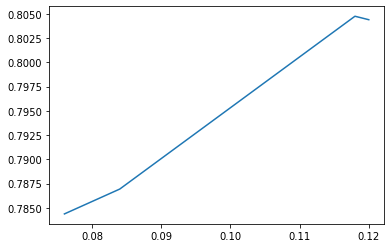

Area under curve: 0.034953083446696925


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = fpr # false_positive_rate
y = tpr # true_positive_rate 

# This is the ROC curve
plt.plot(x,y)
plt.show() 

# This is the AUC
auc = np.trapz(y,x)
print("Area under curve:", auc)